# Task2 Unsupervised Learning

## Zaeem Ahmed

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### READING DATA

In [2]:
iris_df = pd.read_csv(r"C:\Users\Zaeem Ahmed\Desktop\Sparksinternship\kmean_clustering\Iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### ASSIGNING NIUMBERS TO SPECIES

In [4]:
iris_df["Species"] = iris_df["Species"].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2])
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### DESCRIBING DATA

In [5]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


### CHECKING FOR NULL VALUES

In [6]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### INFORMATION OF DATAFRAME

In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


### CHECKING SHAPE OF DATA

In [8]:
iris_df.shape

(150, 6)

### CREATING DATA DATAFRAME AND OUTPUT SERIES

In [9]:
iris_data = iris_df.drop(["Species", "Id"],axis=1)
iris_output = iris_df["Species"]

### PRINCIPAL COMPONENT ANALYSIS OF DATA

In [10]:
pca = PCA(n_components=2).fit(iris_data)
pca_2d = pca.transform(iris_data)

### ELBOW METHOD TO FIND OPTIMAL CLUSTER  NUMBER

In [11]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(iris_df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

### ELBOW PLOT

c:\users\zaeem ahmed\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


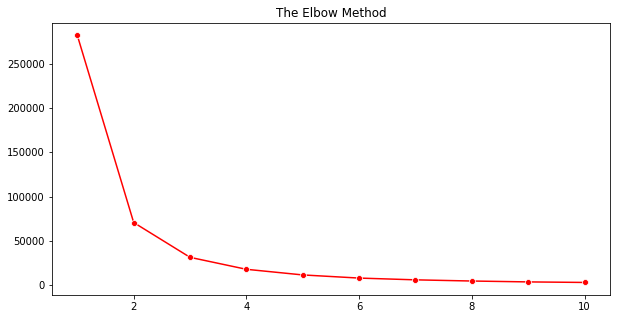

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.show()

### APPLYING K-MEANS ALGORITHM

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300)
label = kmeans.fit_predict(iris_df)

In [14]:
u_labels = np.unique(label)
u_labels

array([0, 1, 2])

### K-MEANS VISUALIZATION

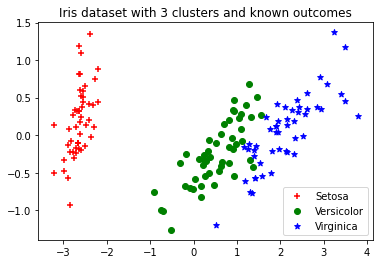

In [15]:
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if iris_output[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif iris_output[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif iris_output[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
pl.legend([c1, c2, c3], ['Setosa', 'Versicolor', 'Virginica'])
pl.title('Iris dataset with 3 clusters and known outcomes')
pl.show()